In [ ]:
# from google.colab import files
# uploaded = files.upload()

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('Tweets.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
df=pd.DataFrame(data) #converting the datset to dataframes by using pandas
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


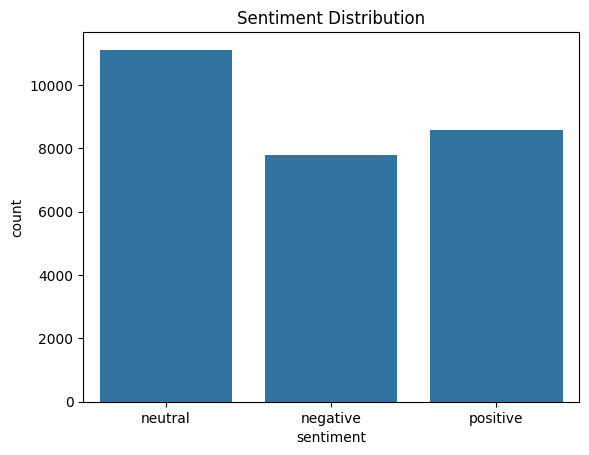

In [ ]:
sns.countplot(x='sentiment', data=a)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
print(a.columns)

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|@[A-Za-z0-9_]+|#', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_sentiment'] = df['sentiment'].apply(preprocess_text)
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment cleaned_sentiment  
0  I`d have responded, if I were going   neutral           neutral  
1                             Sooo SAD  negative          negative  
2                          bullying me  negative          negative  
3                       leave me alone  negative          negative  
4                        Sons of ****,  negative          negative  


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_sentiment'], df['sentiment'], test_size=0.2, random_state=42)

print(f"\nTraining Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")


Training Set Size: 21984
Testing Set Size: 5497


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("\nTF-IDF Feature Shape (Training Set):", X_train_tfidf.shape)


TF-IDF Feature Shape (Training Set): (21984, 3)


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Train a Random Forest Classifier
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

print("\nModel Training Complete!")


Model Training Complete!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict sentiments on the testing set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1562
     neutral       1.00      1.00      1.00      2230
    positive       1.00      1.00      1.00      1705

    accuracy                           1.00      5497
   macro avg       1.00      1.00      1.00      5497
weighted avg       1.00      1.00      1.00      5497

